# Proyecto 1

- Miguel Castillo - 201633992 - ms.castillo.@uniandes.edu.co 
- Estiban Benavides - 202220429 - e.benavidesv@uniandes.edu.co 
- Juan Diego Niebles Navas - 202221193 - j.niebles@uniandes.edu.co


## 1. Modelo Canva

El modelo canva se encuentra en el archivo CANVAS.pdf 

## 2. Entendimiento y preparacion de los datos
### 2.1 Entendimiento de los datos

In [81]:
 # Librería para manejar las contracciones que se presentan en el inglés.
%pip install contractions
 # librería para manejar las flexiones gramaticales en el idioma inglés.
%pip install inflect
# Manejo de gráficas
%pip install scikit-plot
%pip install nltk
%pip install openpyxl
import nltk
# Punkt permite separar un texto en frases.
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')
# Asegúrate de tener los recursos descargados
nltk.download('omw-1.4')

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\msant\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\msant\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\msant\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\msant\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\msant\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [82]:
import pandas as pd
import numpy as np


import re, string, unicodedata
import contractions
import inflect
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report, confusion_matrix


from sklearn.base import BaseEstimator, ClassifierMixin

import matplotlib.pyplot as plt
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [83]:

data=pd.read_excel('data/Datos_proyecto.xlsx')

In [84]:
data.shape
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2424 entries, 0 to 2423
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   textos  2424 non-null   object
 1   labels  2424 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 38.0+ KB


textos  labels
0  "Aprendizaje" y "educación" se consideran sinó...       4
1  Para los niños más pequeños (bebés y niños peq...       4
2  Además, la formación de especialistas en medic...       3
3  En los países de la OCDE se tiende a pasar de ...       4
4  Este grupo se centró en las personas que padec...       3

Podemos observar que los datos solo contienen dos columnas, una de tipo object y otra de tipo entero. En este caso el object contiene el texto de la opinion, mientras que el int hace referencia al ODS al que esta vinculada la opinion

C:\Users\msant\AppData\Local\Temp\ipykernel_28384\98627521.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(data['labels'])
C:\Users\msant\AppData\Local\Temp\ipykernel_28384\98627521.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(data['labels']).plot.bar()


<Axes: xlabel='labels'>

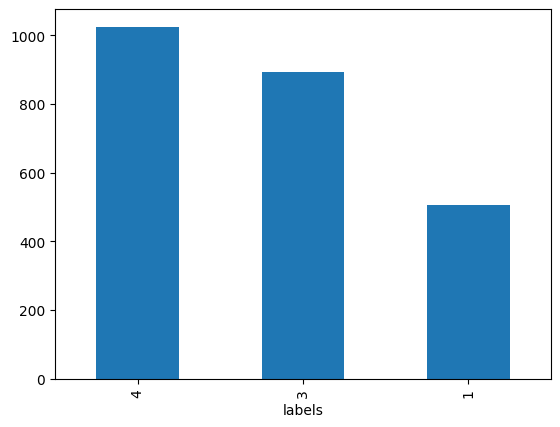

In [85]:
pd.value_counts(data['labels'])
pd.value_counts(data['labels']).plot.bar()

Esta grafica nos permite ver que existe un desbalance de clase significativo para la clase uno, la cual tiene menos datos que las otras dos

In [86]:
data.isnull().sum()
data_t = data

In [87]:

textos = data_t.copy()
textos['Conteo'] = [len(x) for x in textos['textos']]
#textos['Moda'] =
textos['Max'] = [[max([len(x) for x in i.split(' ')])][0] for i in textos['textos']]
textos['Min'] = [[min([len(x) for x in i.split(' ')])][0] for i in textos['textos']]

In [88]:
textos

textos  labels  Conteo  Max  \
0     "Aprendizaje" y "educación" se consideran sinó...       4     352   14   
1     Para los niños más pequeños (bebés y niños peq...       4     516   16   
2     Además, la formación de especialistas en medic...       3     659   15   
3     En los países de la OCDE se tiende a pasar de ...       4     693   18   
4     Este grupo se centró en las personas que padec...       3     608   14   
...                                                 ...     ...     ...  ...   
2419  La tutoría de carrera está diseñada para apoya...       4     741   16   
2420  Fuente: Ministerio de Educación. Las Tasas Int...       4     541   15   
2421  Y desde 2010, el PNUD ha sido pionero en la pu...       1     352   12   
2422  Sin embargo, estas fallas del mercado implican...       3     754   15   
2423  Aunque existen programas para convertirse espe...       4     593   25   

      Min  
0       1  
1       1  
2       1  
3       1  
4       0  
...   ...  
2419    1  
2420    1  
2421    1  
2422    1  
2423    1  

[2424 rows x 5 columns]

### 2.2 Preparacion de los datos

En esta seccion se va a realizar una preparacion y preprocesamiento de los datos, buscando reducir el ruido que hay en el texto, para quedarse solo con la informacion que nos permita clasificar correctamente una opinion

In [89]:
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        if word is not None:
          new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
          new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = [word.lower() if word is not None else '' for word in words]
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        if word is not None:
            new_word = re.sub(r'[^\w\s]', '', word)
            if new_word != '':
                new_words.append(new_word)
    return new_words

def replace_numbers(words):
   """Replace all interger occurrences in list of tokenized words with textual representation"""
   p = inflect.engine()
   print(words)
   new_words = []
   for word in words:
       if word.isdigit():
           new_word = p.number_to_words(word)
           new_words.append(new_word)
           print("if " + new_word)
       else:
           new_words.append(word)
   return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    stop_words = set(stopwords.words('spanish'))
    return [word for word in words if word not in stop_words]

def preprocessing(words):
    words = to_lowercase(words)
    words = replace_numbers(words)
    words = remove_punctuation(words)
    words = remove_non_ascii(words)
    words = remove_stopwords(words)
    return words

#### 2.2.1 tokenizacion

En esta seccion realizamos la tokenizacion de los textos en donde cada texto termina siendo representada como una lista de palabras para que los modelos puedan trabajar con esto.

In [90]:
data_t['textos'] = data_t['textos'].apply(contractions.fix)

In [91]:
data_t['words'] = data_t['textos'].apply(word_tokenize)
data_t.head()

textos  labels  \
0  "Aprendizaje" y "educación" se consideran sinó...       4   
1  Para los niños más pequeños (bebés y niños peq...       4   
2  Además, la formación de especialistas en medic...       3   
3  En los países de la OCDE se tiende a pasar de ...       4   
4  Este grupo se centró en las personas que padec...       3   

                                               words  
0  [``, Aprendizaje, '', y, ``, educación, '', se...  
1  [Para, los, niños, más, pequeños, (, bebés, y,...  
2  [Además, ,, la, formación, de, especialistas, ...  
3  [En, los, países, de, la, OCDE, se, tiende, a,...  
4  [Este, grupo, se, centró, en, las, personas, q...

In [92]:
data_t['words'].dropna()

0       [``, Aprendizaje, '', y, ``, educación, '', se...
1       [Para, los, niños, más, pequeños, (, bebés, y,...
2       [Además, ,, la, formación, de, especialistas, ...
3       [En, los, países, de, la, OCDE, se, tiende, a,...
4       [Este, grupo, se, centró, en, las, personas, q...
                              ...                        
2419    [La, tutoría, de, carrera, está, diseñada, par...
2420    [Fuente, :, Ministerio, de, Educación, ., Las,...
2421    [Y, desde, 2010, ,, el, PNUD, ha, sido, pioner...
2422    [Sin, embargo, ,, estas, fallas, del, mercado,...
2423    [Aunque, existen, programas, para, convertirse...
Name: words, Length: 2424, dtype: object

In [93]:
data_t.shape

(2424, 3)

In [94]:
data_t['words'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2424 entries, 0 to 2423
Series name: words
Non-Null Count  Dtype 
--------------  ----- 
2424 non-null   object
dtypes: object(1)
memory usage: 19.1+ KB


In [95]:
data_t['words1']=data_t['words'].apply(preprocessing) #Aplica la eliminación del ruido

data_t.head()

['``', 'aprendizaje', "''", 'y', '``', 'educación', "''", 'se', 'consideran', 'sinónimos', 'de', 'escolarización', 'formal', '.', 'las', 'organizaciones', 'auxiliares', ',', 'como', 'las', 'editoriales', 'de', 'educación', ',', 'las', 'juntas', 'examinadoras', 'y', 'las', 'organizaciones', 'de', 'formación', 'de', 'docentes', ',', 'se', 'consideran', 'extensiones', 'de', 'los', 'acuerdos', 'establecidos', 'por', 'los', 'gobiernos', '.', 'este', 'marco', 'de', 'comprensión', 'se', 'ha', 'vuelto', 'cada', 'vez', 'más', 'inadecuado', '.']
['para', 'los', 'niños', 'más', 'pequeños', '(', 'bebés', 'y', 'niños', 'pequeños', ')', ',', 'la', 'capacitación', 'especializada', 'y', 'práctica', 'parece', 'estar', 'más', 'fuertemente', 'asociada', 'con', 'la', 'calidad', 'pedagógica', 'y', 'los', 'resultados', 'cognitivos', 'y', 'sociales', '.', 'los', 'educadores', 'de', 'la', 'primera', 'infancia', 'se', 'encuentran', 'con', 'entornos', 'sociales', 'cada', 'vez', 'más', 'complejos', 'y', 'se', 'e

textos  labels  \
0  "Aprendizaje" y "educación" se consideran sinó...       4   
1  Para los niños más pequeños (bebés y niños peq...       4   
2  Además, la formación de especialistas en medic...       3   
3  En los países de la OCDE se tiende a pasar de ...       4   
4  Este grupo se centró en las personas que padec...       3   

                                               words  \
0  [``, Aprendizaje, '', y, ``, educación, '', se...   
1  [Para, los, niños, más, pequeños, (, bebés, y,...   
2  [Además, ,, la, formación, de, especialistas, ...   
3  [En, los, países, de, la, OCDE, se, tiende, a,...   
4  [Este, grupo, se, centró, en, las, personas, q...   

                                              words1  
0  [aprendizaje, educacion, consideran, sinonimos...  
1  [ninos, mas, pequenos, bebes, ninos, pequenos,...  
2  [ademas, formacion, especialistas, medicina, g...  
3  [paises, ocde, tiende, pasar, cursos, obligato...  
4  [grupo, centro, personas, padecen, trastornos,...

#### 2.2.2 normalizacion

En esta parte realizamos la normalizacion del texto con stemming y lenmatizacion. Esto para mejorar la consistencia del texto y mejorar el desempeño posterior de los modelos

In [96]:

def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = PorterStemmer()
    return [stemmer.stem(w) for w in words]

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(w, pos="v") for w in words]

def stem_and_lemmatize(words):
    stems = stem_words(words)
    lemmas = lemmatize_verbs(words)
    return stems + lemmas  # concatena las dos versiones

# Aplicar al DataFrame
data_t['words1'] = data_t['words1'].apply(stem_and_lemmatize)

data_t.head()


textos  labels  \
0  "Aprendizaje" y "educación" se consideran sinó...       4   
1  Para los niños más pequeños (bebés y niños peq...       4   
2  Además, la formación de especialistas en medic...       3   
3  En los países de la OCDE se tiende a pasar de ...       4   
4  Este grupo se centró en las personas que padec...       3   

                                               words  \
0  [``, Aprendizaje, '', y, ``, educación, '', se...   
1  [Para, los, niños, más, pequeños, (, bebés, y,...   
2  [Además, ,, la, formación, de, especialistas, ...   
3  [En, los, países, de, la, OCDE, se, tiende, a,...   
4  [Este, grupo, se, centró, en, las, personas, q...   

                                              words1  
0  [aprendizaj, educacion, consideran, sinonimo, ...  
1  [nino, ma, pequeno, bebe, nino, pequeno, capac...  
2  [adema, formacion, especialista, medicina, gen...  
3  [pais, ocd, tiend, pasar, curso, obligatorio, ...  
4  [grupo, centro, persona, padecen, trastorno, m...

In [97]:
data_t['words1'] = data_t['words1'].apply(lambda x: ' '.join(map(str, x)))
data_t

textos  labels  \
0     "Aprendizaje" y "educación" se consideran sinó...       4   
1     Para los niños más pequeños (bebés y niños peq...       4   
2     Además, la formación de especialistas en medic...       3   
3     En los países de la OCDE se tiende a pasar de ...       4   
4     Este grupo se centró en las personas que padec...       3   
...                                                 ...     ...   
2419  La tutoría de carrera está diseñada para apoya...       4   
2420  Fuente: Ministerio de Educación. Las Tasas Int...       4   
2421  Y desde 2010, el PNUD ha sido pionero en la pu...       1   
2422  Sin embargo, estas fallas del mercado implican...       3   
2423  Aunque existen programas para convertirse espe...       4   

                                                  words  \
0     [``, Aprendizaje, '', y, ``, educación, '', se...   
1     [Para, los, niños, más, pequeños, (, bebés, y,...   
2     [Además, ,, la, formación, de, especialistas, ...   
3     [En, los, países, de, la, OCDE, se, tiende, a,...   
4     [Este, grupo, se, centró, en, las, personas, q...   
...                                                 ...   
2419  [La, tutoría, de, carrera, está, diseñada, par...   
2420  [Fuente, :, Ministerio, de, Educación, ., Las,...   
2421  [Y, desde, 2010, ,, el, PNUD, ha, sido, pioner...   
2422  [Sin, embargo, ,, estas, fallas, del, mercado,...   
2423  [Aunque, existen, programas, para, convertirse...   

                                                 words1  
0     aprendizaj educacion consideran sinonimo escol...  
1     nino ma pequeno bebe nino pequeno capacitacion...  
2     adema formacion especialista medicina gener ta...  
3     pais ocd tiend pasar curso obligatorio optativ...  
4     grupo centro persona padecen trastorno mental ...  
...                                                 ...  
2419  tutoria carrera disenada apoyar estudiant cons...  
2420  fuent ministerio educacion tasa interna retorn...  
2421  two thousand and ten pnud sido pionero puesta ...  
2422  embargo falla mercado implican competencia si ...  
2423  aunqu existen programa convertirs especificame...  

[2424 rows x 4 columns]

In [98]:
data_t['texto_procesado'] = data_t['words1'].apply(lambda x: " ".join(x))

print(data_t['texto_procesado'].head(10))

print("Filas vacías:", (data_t['texto_procesado'] == "").sum())

print("NaN:", data_t['texto_procesado'].isna().sum())


0    a p r e n d i z a j   e d u c a c i o n   c o ...
1    n i n o   m a   p e q u e n o   b e b e   n i ...
2    a d e m a   f o r m a c i o n   e s p e c i a ...
3    p a i s   o c d   t i e n d   p a s a r   c u ...
4    g r u p o   c e n t r o   p e r s o n a   p a ...
5    d a t o   n i v e l   s i s t e m a   d e r i ...
6    p r i n c i p   v e n t a j a   e v a l u a c ...
7    p a c i e n t   p u e d e n   e l e g i r   c ...
8    h e c h o   p r o b a b l   d e s i g n a c i ...
9    h e c h o   a u n q u   c h i l e   u r u g u ...
Name: texto_procesado, dtype: object
Filas vacías: 0
NaN: 0


In [99]:
print(data_t['words1'].head(10))

0    aprendizaj educacion consideran sinonimo escol...
1    nino ma pequeno bebe nino pequeno capacitacion...
2    adema formacion especialista medicina gener ta...
3    pais ocd tiend pasar curso obligatorio optativ...
4    grupo centro persona padecen trastorno mental ...
5    dato nivel sistema derivan cuestionario estudi...
6    princip ventaja evaluacion externa fiabilidad ...
7    pacient pueden elegir cualquier medico cabecer...
8    hecho probabl designacion universidad universi...
9    hecho aunqu chile uruguay indic pobreza simila...
Name: words1, dtype: object


#### 2.2.4 Vectorizacion

En esta parte vamos a realizar la vectorizacion del texto usando el modelo TF-IDF el cual es una representacion de BoW. Este paso es fundamental pues nos permite convertir los datos a un formato que pueden entender los modelos.

In [100]:

data_t['texto_procesado'] = data_t['words1']

tfidf_vectorizer = TfidfVectorizer()

X_tfidf = tfidf_vectorizer.fit_transform(data_t['texto_procesado'])

print("Dimensión de la matriz TF-IDF:", X_tfidf.shape)

import pandas as pd
feature_names = tfidf_vectorizer.get_feature_names_out()
df_tfidf = pd.DataFrame(X_tfidf[0].T.todense(), index=feature_names, columns=["tfidf"])
print(df_tfidf.sort_values(by="tfidf", ascending=False).head(10))


Dimensión de la matriz TF-IDF: (2424, 17947)
                   tfidf
consideran      0.467821
vuelto          0.261376
inadecuado      0.253425
escolarizacion  0.224198
formal          0.211112
organizaciones  0.209893
educacion       0.197261
organizacion    0.174313
marco           0.160771
examinadora     0.160487


## 3. Modelos

### 3.1.1 Arbol de decision (Esteban Benavides)

Se va a utilizar un arbol de decision pues es un modelo que se puede implementar y probar de manera rapida, de la misma manera es facil realizar el analisis sobre este

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

X = X_tfidf
y = data_t['labels']  

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

clf = DecisionTreeClassifier(random_state=42)  

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           1       0.88      0.84      0.86       101
           3       0.89      0.92      0.90       179
           4       0.95      0.95      0.95       205

    accuracy                           0.91       485
   macro avg       0.91      0.90      0.90       485
weighted avg       0.91      0.91      0.91       485



### 3.1.2 Matriz de confusion del arbol de decision

In [102]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
classification_r = classification_report(y_test, y_pred)

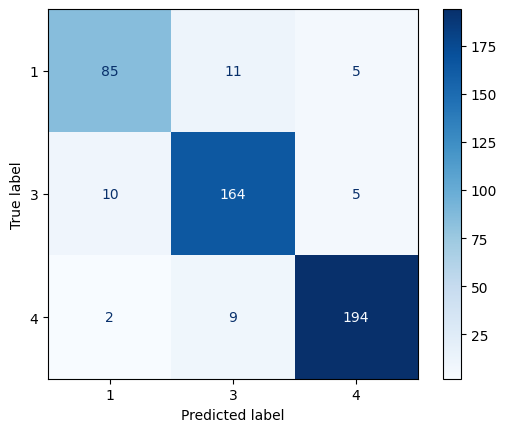

In [103]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues)

plt.show()

Explicacion de los resultados del modelo:

* Opiniones correctamente vinculadas al ODS 1: 85
* Opiniones correctamente vinculadas al ODS 3: 164
* Opiniones correctamente vinculadas al ODS 4: 194
* Opiniones incorrectamente vinculadas al ODS 1: 12
* Opiniones incorrectamente vinculadas al ODS 3: 20
* Opiniones incorrectamente vinculadas al ODS 4: 10

### 3.1.3 Conclusiones sobre el modelo de arbol de decision

El modelo de arbol de decision es bastante confiable, obteniendo una precision,f1 score y recall mayor al 0.8 en cada una de las clases. Se puede observar que en donde el modelo se desempeña peor es al clasificar opiniones vinculadas al ODS 1, esto debido al desbalance de clases que existe en los datos, pues hay menos opiniones vinculadas al ODS 1 en los datos dados. Sin embargo se puede ver que incluso con este desbalance de clases, los resultados obtenidos por este modelos son bastante buenos, y permitirian con una implementacion rapida y sencilla lograr calsificar con una buena precision a que ODS esta vinculada una opinion.

## 3.2.1 Gradient boosting (Miguel Castillo)

Combina múltiples árboles de decisión pequeños y con estos forma un modelo fuerte y preciso. Con cada nuevo modelo corrige los errores del anterior. 

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score

X = X_tfidf
y = data_t['labels']  

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

gb_clf = GradientBoostingClassifier(random_state=42, n_estimators=100, learning_rate= 1, max_depth=3)  

gb_clf.fit(X_train, y_train)

y_pred = gb_clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.95      0.85      0.90       101
           3       0.90      0.96      0.93       179
           4       0.97      0.96      0.97       205

    accuracy                           0.94       485
   macro avg       0.94      0.92      0.93       485
weighted avg       0.94      0.94      0.94       485



### 3.2.2 Matriz de confusion del Gradient boosting

In [105]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
classification_r = classification_report(y_test, y_pred)

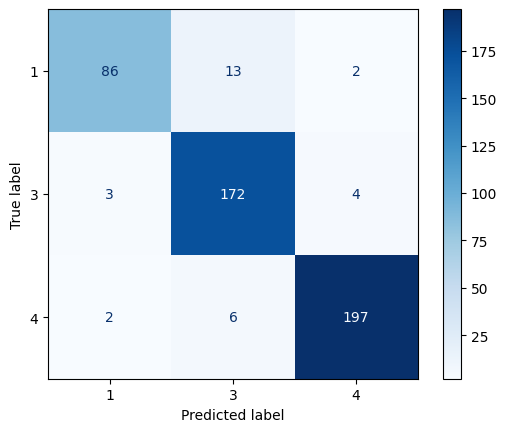

In [106]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues)

plt.show()

Explicacion de los resultados del modelo:

* Opiniones correctamente vinculadas al ODS 1: 84
* Opiniones correctamente vinculadas al ODS 3: 171
* Opiniones correctamente vinculadas al ODS 4: 197
* Opiniones incorrectamente vinculadas al ODS 1: 5
* Opiniones incorrectamente vinculadas al ODS 3: 21
* Opiniones incorrectamente vinculadas al ODS 4: 7

### 3.2.3 Conclusiones sobre el modelo de Gradient boosting

el modelo de Gradient boosting es confiable, obteniendo una precision,f1 score y recall mayor al 85% en cada una de las clases. Se puede observar que en donde el modelo se desempeña peor es al clasificar opiniones vinculadas al ODS 3. Sin embargo se puede ver que incluso con este desbalance de clases, los resultados obtenidos por este modelos son bastante buenos, ya que la diferencia de precicion entre los ODS es menor a un 10% y esto es lo optimo.

## 3.3.1 Support Vector Machine (Juan Diego Niebles)

Support Vector Machine (SVM) es un algoritmo de clasificación superviada que separa las clases mediante un hiperplano de decisión, es decir, genera vectores de soporte que definen la frontera posible entre las clases.

Este algoritmo es ideal para el manejo de los datos ya que luego de nuestro procesamiento de datos quedamos con una alta dimensionalidad y con datos muy dispersos. Esto es ideal para el SVM ya que maneja bien la dimensionalidad y no se deja llevar por features irrelevantes.

A continuación se realiza una implementación del algoritmo para nuestro problema, buscando el mejor hiperparametro:


In [107]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score

X = X_tfidf
y = data_t['labels']  

f1_max = 0
best_c = 0

for i in range(1,100):
    # División del dataset
    X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    svm_clf = LinearSVC(random_state=42, C=i*0.1)

    svm_clf.fit(X_train_svm, y_train_svm)

    y_pred_svm = svm_clf.predict(X_test_svm)
    report = classification_report(y_test_svm, y_pred_svm, output_dict=True)
    f1 = report['weighted avg']['f1-score']
    if f1 > f1_max:
        f1_max = f1
        best_c = i*0.1
        best_model = svm_clf

    

print("Mejor modelo con C=",best_c, "F1-score=", f1_max)




Mejor modelo con C= 6.9 F1-score= 0.9814707908570203


In [108]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score

X = X_tfidf
y = data_t['labels']  



X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

svm_clf = LinearSVC(random_state=42, C=best_c)

svm_clf.fit(X_train_svm, y_train_svm)

y_pred_svm = svm_clf.predict(X_test_svm)



### 3.3.2 Resultados SVM

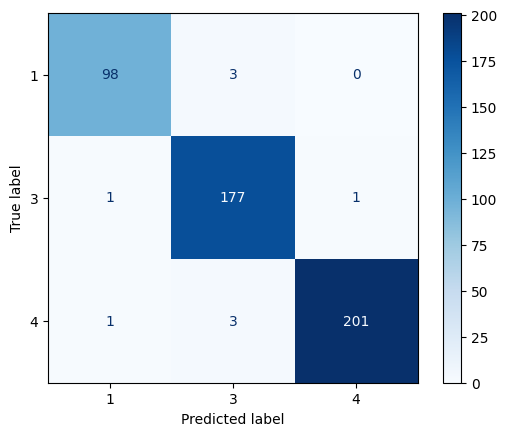

In [109]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(y_test_svm, y_pred_svm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues)

plt.show()

La matriz de confusión indica que clasifica bien las clases de test.

In [110]:
from sklearn.metrics import classification_report, accuracy_score

# Predicciones en train
y_train_pred = svm_clf.predict(X_train_svm)
print("=== REPORTE EN TRAIN ===")
print("Accuracy en TRAIN:", accuracy_score(y_train_svm, y_train_pred))
print(classification_report(y_train_svm, y_train_pred))

# Predicciones en test
y_test_pred = svm_clf.predict(X_test_svm)
print("\n=== REPORTE EN TEST ===")
print("Accuracy en TEST:", accuracy_score(y_test_svm, y_test_pred))
print(classification_report(y_test_svm, y_test_pred))


=== REPORTE EN TRAIN ===
Accuracy en TRAIN: 1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       404
           3       1.00      1.00      1.00       715
           4       1.00      1.00      1.00       820

    accuracy                           1.00      1939
   macro avg       1.00      1.00      1.00      1939
weighted avg       1.00      1.00      1.00      1939


=== REPORTE EN TEST ===
Accuracy en TEST: 0.9814432989690721
              precision    recall  f1-score   support

           1       0.98      0.97      0.98       101
           3       0.97      0.99      0.98       179
           4       1.00      0.98      0.99       205

    accuracy                           0.98       485
   macro avg       0.98      0.98      0.98       485
weighted avg       0.98      0.98      0.98       485



Inicialmente se puede evidenciar que el modelo se aprendió los datos de entrenamiento. Esto es normal en SVM, y más por la dispersión y dimensionalidad de los datos además de que el modelo busca aprenderse estas tendencias. Sin embargo, no parece haber sobreentrenamiento en cuanto a que se está generalizando de forma correcta, manteniendo métricas altas en todos los aspectos.

Sin embargo, para verificar que no se haya sobreentrenado se va a realizar un crossvalidation:

In [111]:
from sklearn.model_selection import cross_validate

svm_clf_cross = LinearSVC(random_state=42, C=best_c)

scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

cv_results = cross_validate(svm_clf_cross, X, y, cv=10, scoring=scoring)

print("Accuracy por fold:", cv_results['test_accuracy'])
print("Accuracy promedio:", np.mean(cv_results['test_accuracy']))
print("F1_macro promedio:", np.mean(cv_results['test_f1_macro']))
print("Desviación estándar del F1_macro:", np.std(cv_results['test_f1_macro']))



Accuracy por fold: [0.96296296 0.98353909 0.99176955 0.98765432 0.97107438 0.96694215
 0.98347107 0.97933884 0.97520661 0.97933884]
Accuracy promedio: 0.9781297826752372
F1_macro promedio: 0.9764960365640507
Desviación estándar del F1_macro: 0.00928165207128555


A partir de este cross validetion se puede observar que el modelo no está sobreentrenado, ya que las métricas se mantienen altas y consistentes a través de los diferentes folds. Esto indica que el modelo generaliza bien a datos no vistos y no se ha ajustado demasiado a los datos de entrenamiento.

## 4. Resultados

### 4.1. Descripción de los resultados obtenidos

Se puede concluir que los modelos de clasificación en general tuvieron buenos rendimientos, llegando a tener precisiones y recall mayores al 80% en todas los modelos. Sin embargo, se puede decir que el mejor modelo en sus respectivos datos de validación fue el modelo SVM. Esto quiere decir que los grupos se encuentran bastante separados entre si, lo que permite que se el algoritmo se desempeñe de una mejor manera. Eso es bueno para el negocio ya que implica que se va a poder clasificar de forma muy precisa (casi 100%) los comentarios de los ODS, llegando a facilitar la tarea luego de poder interpretar las opiniones.

### 4.2 Palabras más comunes 

A continuación se van a mostrar las palabras más comunes para clasificar un texto como parte de una clase o como para alejarla de esta clase:

In [112]:
import numpy as np


feature_names = tfidf_vectorizer.get_feature_names_out()

coefs = svm_clf.coef_

for i, clase in enumerate(svm_clf.classes_):
    print(f"\nClase: {clase}")
    top_indices = np.argsort(coefs[i])[-10:]  
    bottom_indices = np.argsort(coefs[i])[:10]  
    
    print("Más asociadas (+):", feature_names[top_indices])
    print("Más asociadas (-):", feature_names[bottom_indices])



Clase: 1
Más asociadas (+): ['empleo' 'efectivo' 'hogar' 'ingreso' 'social' 'proteccion' 'privacion'
 'pobres' 'pobr' 'pobreza']
Más asociadas (-): ['salud' 'escuela' 'atencion' 'enfermedad' 'educacion' 'mortalidad'
 'educativa' 'estudiantes' 'ocd' 'ocde']

Clase: 3
Más asociadas (+): ['medicina' 'pacient' 'alcohol' 'medico' 'sanitaria' 'mortalidad' 'mental'
 'enfermedad' 'atencion' 'salud']
Más asociadas (-): ['pobreza' 'educacion' 'escuela' 'escolar' 'pobr' 'educativo' 'privacion'
 'pobres' 'estudiant' 'escuelas']

Clase: 4
Más asociadas (+): ['pisa' 'escuelas' 'ensenanza' 'estudiant' 'educativo' 'escolar'
 'estudiantes' 'educativa' 'escuela' 'educacion']
Más asociadas (-): ['salud' 'pobreza' 'atencion' 'mental' 'medicina' 'medico' 'tratamiento'
 'hogar' 'pacient' 'suicidio']


Inicialmente se puede evidenciar que se encontraron las palabras que se asocian de forma positiva (que cuando aparecen es probable que sean de esa clase) y las negativas (que cuando aparecen el modelo se aleja de esa clase). 

Esta información es útil para el negocio ya que se puede evidenciar las palabras a las que se asocian cada uno de los ODS, lo cuál puede llevar a indicios de qué es lo que la ciudadanía opina sobre los ODS. Por ejemplo, se puede ver que para el primer ODS (fin de la pobreza), se relacionan palabras como empleo, hogar, ingresso y protección, lo cuál puede reflejar la necesidad de estos factores para cumplir el objetivo. En cuanto al ODS 3 (salud y bienestar), se pueden ver terminos como atención, alcohol, medico, por lo que se puede pensar en esos factores como prioritarios en la atención médica. En cuanto al ODS 4 (educación de calidad) se asocian palabras como pisa, escuelas, enseñanza, por lo que se refleja la importancia de instituciones educativas para reflejar resultados en pruebas estandarizadas.


### 4.3 Exportación de datos de prueba
### 4.3.1 Pipel Line del Modelo escogido

Se ha escodigo el modelo de SVM

##### 4.3.1.1 cargar y Procesar datos

In [113]:
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        if word is not None:
          new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
          new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = [word.lower() if word is not None else '' for word in words]
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        if word is not None:
            new_word = re.sub(r'[^\w\s]', '', word)
            if new_word != '':
                new_words.append(new_word)
    return new_words

def replace_numbers(words):
   """Replace all interger occurrences in list of tokenized words with textual representation"""
   p = inflect.engine()
   print(words)
   new_words = []
   for word in words:
       if word.isdigit():
           new_word = p.number_to_words(word)
           new_words.append(new_word)
           print("if " + new_word)
       else:
           new_words.append(word)
   return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    stop_words = set(stopwords.words('spanish'))
    return [word for word in words if word not in stop_words]

def preprocessing(words):
    words = to_lowercase(words)
    words = replace_numbers(words)
    words = remove_punctuation(words)
    words = remove_non_ascii(words)
    words = remove_stopwords(words)
    return words


def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = PorterStemmer()
    return [stemmer.stem(w) for w in words]

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(w, pos="v") for w in words]

def stem_and_lemmatize(words):
    stems = stem_words(words)
    lemmas = lemmatize_verbs(words)
    return stems + lemmas  # concatena las dos versiones


def cargarProcesarDatos(datos,):
    data = datos.copy()

    data['textos'] = data['textos'].apply(contractions.fix)

    data['words'] = data['textos'].apply(word_tokenize)

    data['words1']=data['words'].apply(preprocessing)

    data['words1'] = data['words1'].apply(stem_and_lemmatize)
    
    data['words'].dropna() 

    data['words1'] = data['words1'].apply(lambda x: ' '.join(map(str, x)))

    data['texto_procesado'] = data['words1'].apply(lambda x: " ".join(x))

    data['texto_procesado'] = data['words1']


    

    return data

##### 4.3.1.2 Entrenar Modelo

In [114]:
def ModeloSV(X_tfidf):
    X = X_tfidf
    y = data_t['labels']  

    f1_max = 0
    best_c = 0

    for i in range(1,100):
        # División del dataset
        X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(
            X, y, test_size=0.2, random_state=42, stratify=y
        )

        svm_clf = LinearSVC(random_state=42, C=i*0.1)

        svm_clf.fit(X_train_svm, y_train_svm)

        y_pred_svm = svm_clf.predict(X_test_svm)
        report = classification_report(y_test_svm, y_pred_svm, output_dict=True)
        f1 = report['weighted avg']['f1-score']
        if f1 > f1_max:
            f1_max = f1
            best_c = i*0.1
            best_model = svm_clf

    
    X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    svm_clf = LinearSVC(random_state=42, C=best_c)

    svm_clf.fit(X_train_svm, y_train_svm)

    y_pred_svm = svm_clf.predict(X_test_svm)
    # Predicciones en train
    y_train_pred = svm_clf.predict(X_train_svm)
    print("=== REPORTE EN TRAIN ===")
    print("Accuracy en TRAIN:", accuracy_score(y_train_svm, y_train_pred))
    print(classification_report(y_train_svm, y_train_pred))

    # Predicciones en test
    y_test_pred = svm_clf.predict(X_test_svm)
    print("\n=== REPORTE EN TEST ===")
    print("Accuracy en TEST:", accuracy_score(y_test_svm, y_test_pred))
    print(classification_report(y_test_svm, y_test_pred))


    return(svm_clf)

    

    



##### 4.3.2 Ejecutando el Pipeline 

In [115]:
datos =pd.read_excel('data/Datos_proyecto.xlsx')

tfidf_vectorizer = TfidfVectorizer()

data = cargarProcesarDatos(datos )

data = tfidf_vectorizer.fit_transform(data['texto_procesado'])

modelo = ModeloSV(data)



['``', 'aprendizaje', "''", 'y', '``', 'educación', "''", 'se', 'consideran', 'sinónimos', 'de', 'escolarización', 'formal', '.', 'las', 'organizaciones', 'auxiliares', ',', 'como', 'las', 'editoriales', 'de', 'educación', ',', 'las', 'juntas', 'examinadoras', 'y', 'las', 'organizaciones', 'de', 'formación', 'de', 'docentes', ',', 'se', 'consideran', 'extensiones', 'de', 'los', 'acuerdos', 'establecidos', 'por', 'los', 'gobiernos', '.', 'este', 'marco', 'de', 'comprensión', 'se', 'ha', 'vuelto', 'cada', 'vez', 'más', 'inadecuado', '.']
['para', 'los', 'niños', 'más', 'pequeños', '(', 'bebés', 'y', 'niños', 'pequeños', ')', ',', 'la', 'capacitación', 'especializada', 'y', 'práctica', 'parece', 'estar', 'más', 'fuertemente', 'asociada', 'con', 'la', 'calidad', 'pedagógica', 'y', 'los', 'resultados', 'cognitivos', 'y', 'sociales', '.', 'los', 'educadores', 'de', 'la', 'primera', 'infancia', 'se', 'encuentran', 'con', 'entornos', 'sociales', 'cada', 'vez', 'más', 'complejos', 'y', 'se', 'e

### 3.3.3 Predecir las etiquetas y pasarlas a un excel

In [116]:
datosPrueba = pd.read_excel('data/Datos_de_prueba_proyecto.xlsx')
datosPrueba = datosPrueba.rename(columns={'Textos_espanol': 'textos'})
datosPruebaProcesados = cargarProcesarDatos(datosPrueba)

datosPruebaProcesados = tfidf_vectorizer.transform(datosPruebaProcesados['texto_procesado'])



prediccion = modelo.predict(datosPruebaProcesados)

datosPrueba['prediccion'] = prediccion
datosPrueba.to_excel('resultados_prediccion.xlsx', index=False)


['el', 'rector', ',', 'que', 'es', 'el', 'representante', 'local', 'del', 'ministerio', 'de', 'educación', ',', 'tiene', 'la', 'responsabilidad', 'principal', 'de', 'procesar', 'la', 'evaluación', '.', 'a', 'pesar', 'de', 'esta', 'centralización', ',', 'el', 'sistema', 'francés', 'se', 'basa', 'en', 'gran', 'medida', 'en', 'el', 'principio', 'de', 'participación', 'y', ',', 'por', 'lo', 'tanto', ',', 'los', 'docentes', 'están', 'involucrados', 'en', 'todos', 'los', 'procesos', '(', 'inca', 'france', ',', '2008', ')', '.', 'aunque', 'existían', 'diferencias', 'entre', 'los', 'procedimientos', 'de', 'evaluación', 'en', 'los', 'länder', 'alemanes', ',', 'la', 'única', 'herramienta', 'de', 'verificación', 'era', 'la', 'recopilación', 'de', 'algunos', 'documentos', 'de', 'muestra', 'para', 'la', 'verificación', 'central', '.', 'a', 'estas', 'alturas', ',', 'sin', 'embargo', ',', 'la', 'mayoría', 'de', 'los', 'länder', 'han', 'introducido', 'exámenes', 'centrales', 'hasta', 'cierto', 'punto'

### 3.4 Video conclusión

El video de conclusión se encuentra en la wiki del repositorio y también dentro del siguiente enlace: https://youtu.be/VVb6iNu7OJo 

# 5: Trabajo en equipo 

## 5.1 Roles

- Esteban Benavides \
Rol: Líder de datos \
Tareas: Entendimiento, limpieza y preparación de los datos (2h), implementación del algoritmo de Árbol de decisión (1h), apoyo en video (1h), desarrollo del Canva (30m)
Algoritmo: Árbol de decisión \
Tiempo dedicado: 4.5h \
Uso de IA: Utilice la IA como apoyo para la implementación del modelo, y para la resolución de ciertos errores durante la preparación de los datos.


- Miguel Castillo \
Rol: Líder de negocio \
Tareas:Creación del pipeline del modelo escogido (30 mins), Predicción de los resultados (1h), Creación del modelo Gradient boosting (1h), creación del video (1h), desarrollar el Canva (1h). \
Algoritmo: Gradient boosting \
Tiempo dedicado: 4.5h \
Uso de IA: Utilice la IA como apoyo para crear el modelo y como guía para solucionar errores. 


- Juan Diego Niebles \
Rol: Líder de analítica \
Tareas: Ayuda en desarrollar el Canva (1h), implementación modelo SVM y análisis de esos resultados (1h), análisis palabras que representan las clases (30m), implementación BETO (1h), apoyo en video (1h). \
Algoritmo: SVM y BETO \
Tiempo dedicado: 4.5h \
Uso de IA: Utilicé la IA como apoyo para implementar los modelos, como guia para solucionar errores y como mentor para entender a mayor profundidad las implementaciones y los conceptos de cada modelo. 

Distribución de 100 puntos:

Nos distribuimos los puntos de forma equitativa dandonos la misma cantidad a cada uno (33.3).





# 6. Bono

El bono se implemento utilizando el Transformador BETO. Este transformador utiliza word embedding para poder entender el contexto de la situación. Este sistema de word embedding lo utiliza en las capas iniciales para poder entender el lenguaje. BETO es un transformador que viene preentrenado y que se utiliza para ajustar a los problemas especificos que se pueden tener, como en este caso, la clasificación de ODS. Al ser computacionalmente más pesado, fue entrenado en otro notebook en google colab. El notebook ejecutado se encuentra en bono_beto.ipynb. Los resultados del modelo fueron:

| Split   | Accuracy | F1  | Precision  | Recall |
|---------|----------|---------------|---------------|------------|
| Valid   | 0.9835   | 0.9835        | 0.9835        | 0.9835     |
| Test    | 0.9877   | 0.9877        | 0.9880        | 0.9877     |

Se puede evidenciar que este modelo es ligeramente mejor a los implementados. Esto se puede dar gracias a una busqueda de hiperparametros más completa y a que el transformador busca entender también el contexto en el que se usan las palabras.

